In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [9]:
df=pd.read_csv('uber.csv')

In [10]:
print(df.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [11]:
print(data.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [14]:
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour

In [16]:
df = df.drop(['pickup_datetime', 'key'], axis = 1)

In [17]:
df

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19.0
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20.0
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21.0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8.0
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17.0
...,...,...,...,...,...,...,...,...
199995,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10.0
199996,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.0
199997,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0.0
199998,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14.0


In [20]:
Q1 =df['fare_amount'].quantile(0.25)
Q3 =df['fare_amount'].quantile(0.75)
IQR =Q3-Q1
df = df[(df['fare_amount'] >= (Q1-1.5*IQR)) & (df['fare_amount']<=(Q3 + 1.5 * IQR))]

In [21]:
correlation_matrix = df.corr()
print(correlation_matrix['fare_amount'])

Unnamed: 0          -0.001885
fare_amount          1.000000
pickup_longitude    -0.001505
pickup_latitude      0.004593
dropoff_longitude   -0.004605
dropoff_latitude     0.002338
passenger_count      0.015551
pickup_hour         -0.003995
Name: fare_amount, dtype: float64


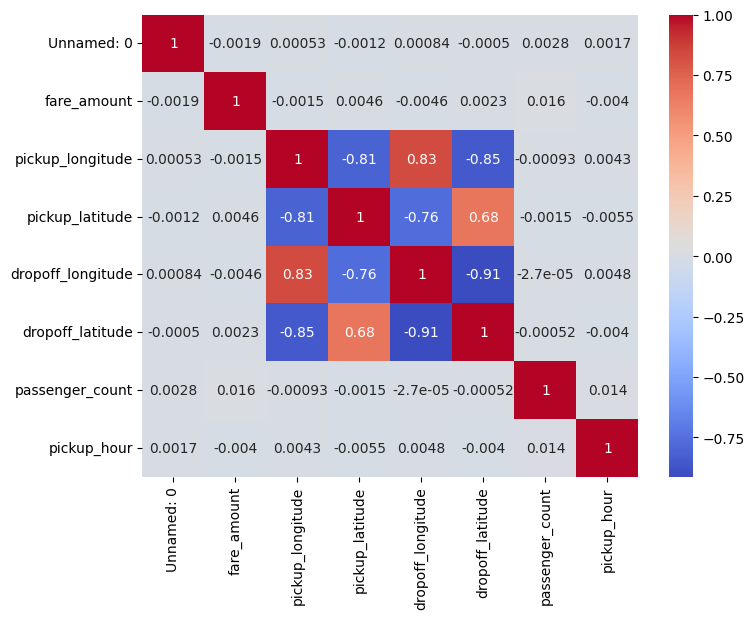

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Regression Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [26]:
# Linear Regression Evaluation
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression - R²: {r2_lr:.2f}, RMSE: {rmse_lr:.2f}")

# Random Forest Regression Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest - R²: {r2_rf:.2f}, RMSE: {rmse_rf:.2f}")


Linear Regression - R²: 0.00, RMSE: 3.64
Random Forest - R²: 0.70, RMSE: 2.01
